In [1]:
import os
import sys
sys.path.append("..")
import phage_init

In [2]:
#load the saved matrices
import pickle
train_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"train_x.p"), "rb" ) )
test_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"test_x.p"), "rb" ) )
train_Y=pickle.load(open( os.path.join(phage_init.data_dir,"train_y.p"), "rb" ) )
test_Y=pickle.load(open( os.path.join(phage_init.data_dir,"test_y.p"), "rb" ) )
mean_total=pickle.load(open( os.path.join(phage_init.data_dir,"mean.p"), "rb" ) )
std_total=pickle.load(open( os.path.join(phage_init.data_dir,"std.p"), "rb" ) )

In [3]:
di_train     = train_X_total[:,0:400]
tri_train    = train_X_total[:,400:8400]
di_sc_train  = train_X_total[:,8400:8449] 
tri_sc_train = train_X_total[:,8449:8792]
tt_train     = train_X_total[:,8792:]

In [4]:
di_test     = test_X_total[:,0:400]
tri_test    = test_X_total[:,400:8400]
di_sc_test  = test_X_total[:,8400:8449] 
tri_sc_test = test_X_total[:,8449:8792]
tt_test     = test_X_total[:,8792:]

In [5]:
mean_di     = mean_total[0:400]
mean_tri    = mean_total[400:8400]
mean_di_sc  = mean_total[8400:8449] 
mean_tri_sc = mean_total[8449:8792]
mean_tt     = mean_total[8792:]

In [6]:
std_di     = std_total[0:400]
std_tri    = std_total[400:8400]
std_di_sc  = std_total[8400:8449] 
std_tri_sc = std_total[8449:8792]
std_tt     = std_total[8792:]

In [7]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [8]:
#print(di_train.shape)
#print(tt_train.shape)
train_X =numpy.concatenate((di_train,tt_train),axis=1)
test_X  =numpy.concatenate((di_test,tt_test),axis=1)
#train_X=di_train
#test_X=di_test
model_name='di_p.h5'

In [9]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16685829898262243198
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15595618304
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12580689878840430352
physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0"
]


In [10]:
print(train_X.shape[1])
f_num=train_X.shape[1]


408


In [11]:
#model with 2 leyers of 100 LSTM neurons
model = Sequential()
opt=Adam(lr=0.007, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(f_num, input_dim=f_num, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 408)               166872    
_________________________________________________________________
dropout_1 (Dropout)          (None, 408)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               81800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [12]:
model.fit(train_X, train_Y, epochs=200,verbose=1, batch_size=200)

Epoch 1/200
25000/25000 [==============================] - 1s 47us/step - loss: 1.0021 - acc: 0.6746
Epoch 2/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.6896 - acc: 0.7715
Epoch 3/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.6107 - acc: 0.7936
Epoch 4/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5820 - acc: 0.8007
Epoch 5/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5516 - acc: 0.8115
Epoch 6/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5124 - acc: 0.8225
Epoch 7/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5102 - acc: 0.8237
Epoch 8/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4901 - acc: 0.8306
Epoch 9/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4788 - acc: 0.8352
Epoch 10/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4611 - a

25000/25000 [==============================] - 1s 21us/step - loss: 0.4137 - acc: 0.8532
Epoch 82/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4274 - acc: 0.8529
Epoch 83/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4481 - acc: 0.8505
Epoch 84/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4730 - acc: 0.8461
Epoch 85/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4492 - acc: 0.8518
Epoch 86/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4413 - acc: 0.8519
Epoch 87/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4443 - acc: 0.8537
Epoch 88/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4405 - acc: 0.8538
Epoch 89/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4641 - acc: 0.8498
Epoch 90/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4673 - acc: 

25000/25000 [==============================] - 1s 21us/step - loss: 0.5401 - acc: 0.8287
Epoch 161/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5052 - acc: 0.8345
Epoch 162/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5309 - acc: 0.8298
Epoch 163/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.5555 - acc: 0.8315
Epoch 164/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.5549 - acc: 0.8326
Epoch 165/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.5289 - acc: 0.8343
Epoch 166/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.5136 - acc: 0.8347
Epoch 167/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4997 - acc: 0.8376
Epoch 168/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5352 - acc: 0.8337
Epoch 169/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.492

In [13]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

675/675 [==============================] - 0s 124us/step
Accuracy: 75.70%


In [14]:
#you can save the as a file so you dont have to train it every time
model.save( os.path.join(phage_init.model_dir,model_name))

In [15]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.92      0.73      0.81        93
     Minor capsid       0.77      0.83      0.80        52
        Baseplate       0.83      0.81      0.82       103
       Major tail       0.90      0.65      0.75        54
       Minor tail       0.88      0.83      0.86        36
           Portal       0.84      0.74      0.79        73
       Tail fiber       0.50      0.57      0.53        87
       Tail shaft       0.65      0.77      0.70        48
           Collar       0.55      0.92      0.69        49
Head-Tail joining       0.96      0.82      0.89        80

      avg / total       0.79      0.76      0.76       675



In [16]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({2: 103, 0: 93, 6: 87, 9: 80, 5: 73, 3: 54, 1: 52, 8: 49, 7: 48, 4: 36})
[93, 52, 103, 54, 36, 73, 87, 48, 49, 80]



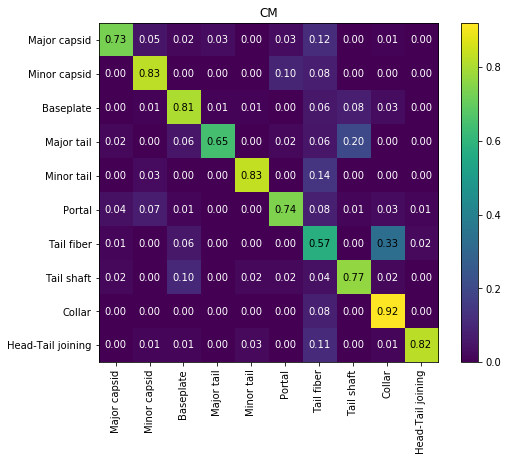

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")
plt.show()